In [5]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2
import pandas as pd

In [3]:
#fake_d = '/mnt/data/datasets/rwth-SPADE-train-2022_06_27_16_44_03/train/'
#fake_d = '/mnt/sda2/datasets/ReACGAN-ADC-DiffAug-train-2022_09_02_12_25_29/train/'
fake_d = '/mnt/sda2/old_home/grios/classifier_results/real/rwth-small/rwth-small-ReACGAN-ADC-DiffAug-highcond/train/'
real_d = '/mnt/sda2/datasets/rwth-small/train/'

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

def showImagesHorizontally(real_d, fake_d, n_real, n_fake, classes):
    n_classes = len(classes)
    fig, axs = plt.subplots(n_classes, n_real+n_fake)    
    for i in range(n_classes):
        real_list = os.listdir(os.path.join(real_d,classes[i]))
        fake_list = os.listdir(os.path.join(fake_d,classes[i]))
        for j in range(n_real):
            image = imread(os.path.join(real_d,classes[i],real_list[j]))
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
        for j in range(n_fake):
            image = imread(os.path.join(fake_d,classes[i],fake_list[j]))
            axs[i, j+n_real].imshow(image)
            axs[i, j+n_real].axis('off')

In [ ]:
classes = os.listdir(real_d)
showImagesHorizontally(real_d, fake_d, 2, 5, classes[8:10])

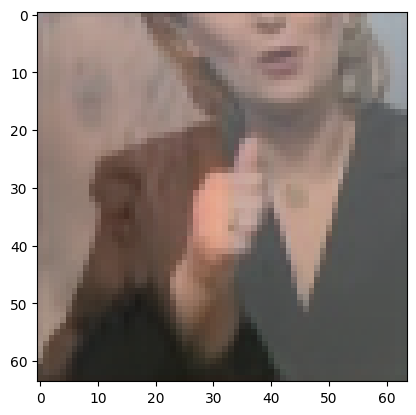

In [27]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

x_a = cv2.resize(imread(os.path.join(real_d,"0","train0.png")), (64,64))
x_b = imread(os.path.join(fake_d,"10","20.png"))
plt.imshow(mixup_data(x_a, x_b)[0])
plt.show()

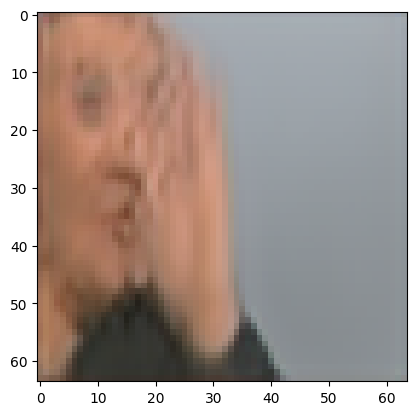

In [24]:
plt.imshow(imread(os.path.join(fake_d,"10","20.png")))
plt.show()

In [21]:
def plot(data):
    # Create x-axis values based on the array length
    x = np.arange(len(data['val']['epoch_acc']))

    # Plot the array of floats
    plt.plot(x, data['val']['epoch_acc'])

    # Add labels and title to the plot
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Array of Floats')

    # Display the plot
    plt.show()

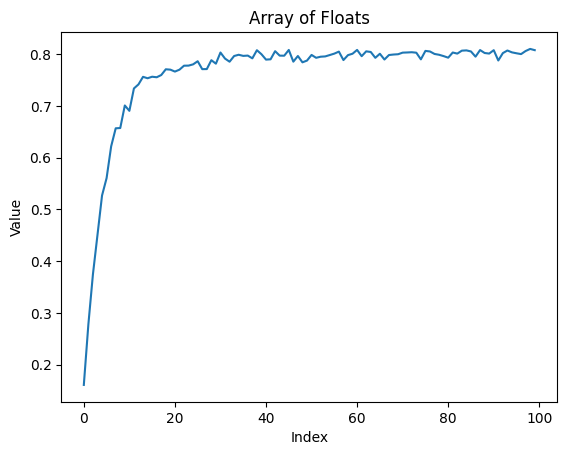

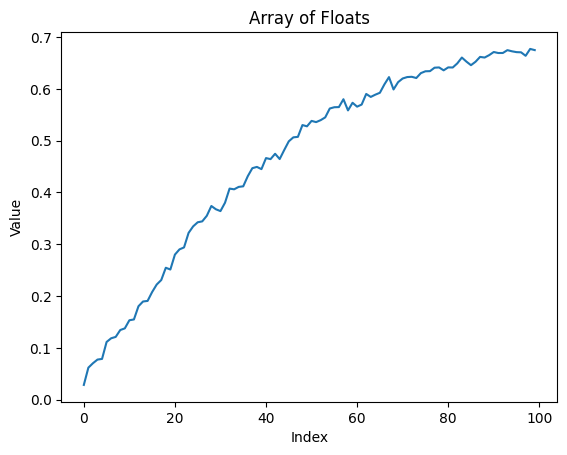

In [28]:
data = pd.read_pickle(r'/mnt/sda2/old_home/grios/classifier_results/gen/hagrid-ReACGAN-ADC-DiffAug-40/train_results.pkl')
plot(data)
data = pd.read_pickle(r'/mnt/sda2/old_home/grios/classifier_results/real/hagrid-40/train_results.pkl')
plot(data)

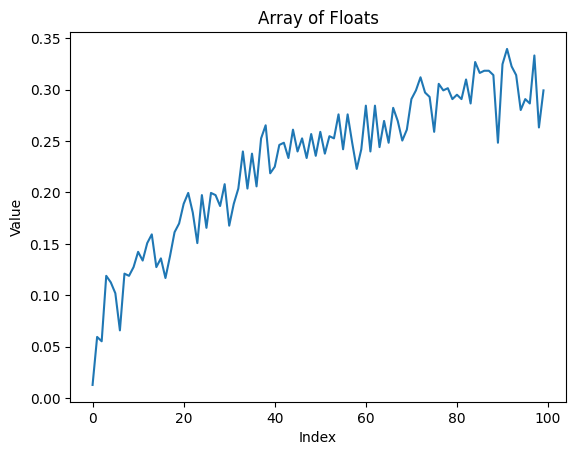

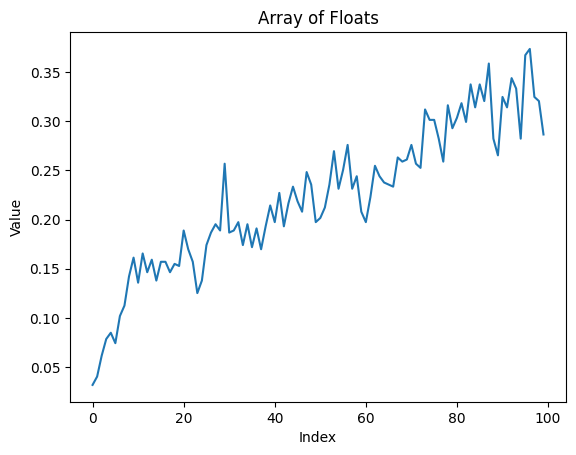

In [39]:
data = pd.read_pickle(r'/mnt/sda2/old_home/grios/classifier_results/regen/rwth-small-ReACGAN-ADC-DiffAug-highcond-10/train_results.pkl')
plot(data)
data = pd.read_pickle(r'/mnt/sda2/old_home/grios/classifier_results/real/rwth-small-10/train_results.pkl')
plot(data)

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('./src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from data_util import Dataset_
from torch.utils.data import DataLoader


/home/grios/myphyton/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
train_dataset = Dataset_(data_name='hagrid',
                        data_dir='/mnt/sda2/datasets/hagrid-complete/',
                        train=True,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path='/mnt/sda2/datasets/hagrid-complete/hagrid-complete_64_pose_skeleton_train.hdf5',
                        normalize=True,
                        load_data_in_memory=False,
                        pose=True,
                        skeleton=True)
train_dataloader = DataLoader(dataset=train_dataset,
                            batch_size=64,
                            shuffle=False,
                            pin_memory=False,
                            num_workers=4,
                            sampler=None,
                            drop_last=False)

In [17]:
eval_dataset = Dataset_(data_name='hagrid',
                        data_dir='/mnt/sda2/datasets/hagrid-complete/',
                        train=False,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=False,
                        pose=True,
                        skeleton=True)
eval_dataloader = DataLoader(dataset=eval_dataset,
                            batch_size=64,
                            shuffle=False,
                            pin_memory=False,
                            num_workers=4,
                            sampler=None,
                            drop_last=False)

/home/grios/myphyton/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [3]:
iterator = iter(train_dataloader)
iterator.next()

NameError: name 'train_dataloader' is not defined

In [18]:
iterator = iter(eval_dataloader)
iterator.next()

[tensor([[[[ 0.0667,  0.0667,  0.0588,  ..., -0.1137, -0.1216, -0.1216],
           [ 0.0667,  0.0667,  0.0588,  ..., -0.1137, -0.1216, -0.1216],
           [ 0.0667,  0.0667,  0.0667,  ..., -0.1137, -0.1216, -0.1216],
           ...,
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1529, -0.1608, -0.1765],
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1608, -0.1686, -0.1765],
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1686, -0.1765, -0.1765]],
 
          [[ 0.0510,  0.0510,  0.0431,  ..., -0.1686, -0.1765, -0.1765],
           [ 0.0510,  0.0510,  0.0431,  ..., -0.1686, -0.1765, -0.1765],
           [ 0.0510,  0.0510,  0.0510,  ..., -0.1686, -0.1765, -0.1765],
           ...,
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2078, -0.2157, -0.2314],
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2157, -0.2235, -0.2314],
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2235, -0.2314, -0.2314]],
 
          [[-0.0510, -0.0510, -0.0588,  ..., -0.2941, -0.3020, -0.3020],
           [-

In [19]:
eval_dataset[0][2]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


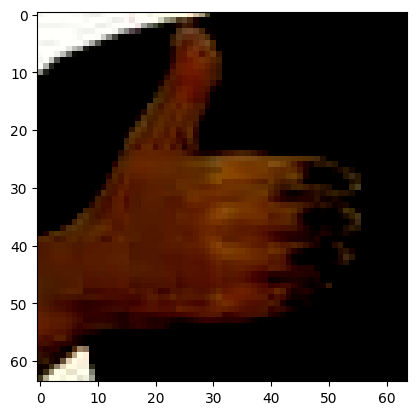

In [41]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import numpy as np

plt.imshow(np.transpose(eval_dataset[410][0], (1,2,0)))
plt.show()

In [21]:
eval_dataset[0][2].shape

torch.Size([20, 64, 64])

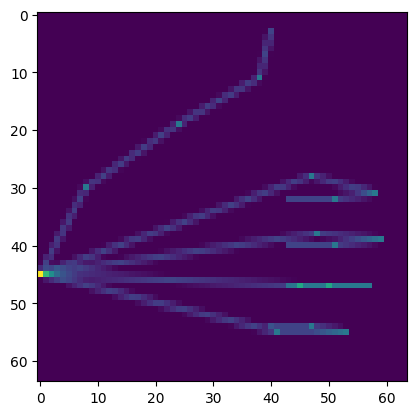

In [42]:
plt.imshow(np.sum(np.transpose(eval_dataset[410][2].numpy(), (1,2,0)),2))
plt.show()

In [ ]:
400, 800 al revez
600,1000 bien

In [9]:
import numpy as np
isinstance(eval_dataset[0][2],np.ndarray)

True